<a href="https://colab.research.google.com/github/harikrishnareddymallavarapu/Masters/blob/main/Masters_Explainability_LDA_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive
Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
import pickle

pkl_file = open('drive/My Drive/Top-Ex/data_lemmatized_new.pkl', 'rb')
data_lemmatized = pickle.load(pkl_file)
pkl_file.close()

pkl_file = open('drive/My Drive/Top-Ex/dictionary_new.pkl', 'rb')
dictionary = pickle.load(pkl_file)
pkl_file.close()

pkl_file = open('drive/My Drive/Top-Ex/corpus_new.pkl', 'rb')
corpus = pickle.load(pkl_file)
pkl_file.close()

pkl_file = open('drive/My Drive/Top-Ex/lda_20_new.pkl', 'rb')
lda_model = pickle.load(pkl_file)
pkl_file.close()

In [ ]:
gamma, _ = lda_model.inference(corpus)
topics = gamma / gamma.sum(axis=1)[:,None]

In [ ]:
topics = pd.DataFrame(topics)
topics.reset_index(drop=True)
topics.rename(columns = lambda x: 'Topic_'+str(x+1).zfill(2), inplace=True)
topics.head()

,Topic_01,Topic_02,Topic_03,Topic_04,Topic_05,Topic_06,Topic_07,Topic_08,Topic_09,Topic_10,Topic_11,Topic_12,Topic_13,Topic_14,Topic_15,Topic_16,Topic_17,Topic_18,Topic_19,Topic_20
0,0.067322,0.007678,0.000438,0.243083,0.005309,0.000731,0.006883,0.086805,0.071966,0.001694,0.022597,0.010804,0.133596,0.000640,0.000602,0.005302,0.333108,0.000389,0.000407,0.000643
1,0.021442,0.087206,0.014915,0.002733,0.001883,0.030547,0.009134,0.033421,0.097003,0.045649,0.148593,0.004537,0.140650,0.020172,0.278967,0.007261,0.047378,0.001608,0.001532,0.005370
2,0.004298,0.082594,0.008812,0.003834,0.002370,0.086435,0.010681,0.064172,0.013705,0.022234,0.122880,0.019330,0.175133,0.018992,0.024341,0.189761,0.067170,0.046291,0.036694,0.000275
3,0.014538,0.075287,0.018987,0.000233,0.067784,0.039817,0.006462,0.131653,0.044122,0.004669,0.059677,0.005896,0.221646,0.014398,0.025254,0.213624,0.030434,0.005583,0.019625,0.000310
4,0.001945,0.035472,0.037059,0.000629,0.015938,0.000957,0.001271,0.054531,0.006660,0.001672,0.015477,0.002575,0.177025,0.273508,0.012672,0.002322,0.260723,0.071673,0.002247,0.025643


In [ ]:
print(lda_model.print_topics())

[(0, '0.039*"election" + 0.038*"campaign" + 0.029*"vote" + 0.027*"presidential" + 0.021*"republican" + 0.020*"candidate" + 0.018*"nominee" + 0.018*"voter" + 0.016*"democratic" + 0.015*"win"'), (1, '0.030*"car" + 0.012*"city" + 0.010*"water" + 0.010*"say" + 0.010*"vehicle" + 0.008*"area" + 0.008*"home" + 0.006*"plane" + 0.006*"leave" + 0.006*"building"'), (2, '0.026*"study" + 0.020*"drug" + 0.015*"patient" + 0.015*"researcher" + 0.015*"test" + 0.013*"research" + 0.013*"scientist" + 0.013*"pain" + 0.012*"brain" + 0.012*"health"'), (3, '0.032*"would" + 0.028*"law" + 0.018*"plan" + 0.018*"federal" + 0.017*"tax" + 0.016*"bill" + 0.014*"program" + 0.013*"rule" + 0.013*"pass" + 0.012*"government"'), (4, '0.049*"game" + 0.039*"team" + 0.023*"play" + 0.022*"player" + 0.020*"season" + 0.016*"sport" + 0.015*"win" + 0.014*"first" + 0.011*"second" + 0.010*"score"'), (5, '0.062*"woman" + 0.035*"family" + 0.034*"school" + 0.033*"child" + 0.024*"man" + 0.022*"black" + 0.019*"white" + 0.018*"college" +

In [ ]:
corpus[0]

[(0, 1),
 (1, 1),
 (2, 1),
 (3, 10),
 (4, 1),
 (5, 1),
 (6, 1),
 (7, 1),
 (8, 2),
 (9, 3),
 (10, 2),
 (11, 1),
 (12, 1),
 (13, 1),
 (14, 1),
 (15, 1),
 (16, 1),
 (17, 1),
 (18, 1),
 (19, 1),
 (20, 1),
 (21, 1),
 (22, 3),
 (23, 2),
 (24, 1),
 (25, 1),
 (26, 1),
 (27, 2),
 (28, 3),
 (29, 1),
 (30, 1),
 (31, 1),
 (32, 1),
 (33, 1),
 (34, 1),
 (35, 2),
 (36, 1),
 (37, 1),
 (38, 1),
 (39, 3),
 (40, 1),
 (41, 1),
 (42, 1),
 (43, 1),
 (44, 2),
 (45, 8),
 (46, 2),
 (47, 1),
 (48, 1),
 (49, 2),
 (50, 1),
 (51, 1),
 (52, 1),
 (53, 1),
 (54, 1),
 (55, 1),
 (56, 1),
 (57, 1),
 (58, 3),
 (59, 1),
 (60, 1),
 (61, 1),
 (62, 1),
 (63, 1),
 (64, 1),
 (65, 1),
 (66, 2),
 (67, 1),
 (68, 1),
 (69, 1),
 (70, 1),
 (71, 1),
 (72, 1),
 (73, 1),
 (74, 1),
 (75, 1),
 (76, 1),
 (77, 1),
 (78, 1),
 (79, 1),
 (80, 2),
 (81, 2),
 (82, 1),
 (83, 1),
 (84, 1),
 (85, 1),
 (86, 1),
 (87, 1),
 (88, 1),
 (89, 2),
 (90, 1),
 (91, 1),
 (92, 1),
 (93, 1),
 (94, 2),
 (95, 6),
 (96, 1),
 (97, 1),
 (98, 1),
 (99, 1),
 (100, 1)

In [ ]:
def getTopicVariations(model, corpusItem):
  predict = []
  for i in range(len(corpusItem)):
    predict.append(model.get_document_topics(corpusItem[0:i]))
  return predict

In [ ]:
k = getTopicVariations(lda_model,corpus[0])

In [ ]:
def convertTopicstoDF(topicList,topicTotalCount):
  columnsList= []
  for i in range(topicTotalCount):
    columnsList.append("Topic-"+str(i))
  dataFrame = pd.DataFrame(columns=columnsList)
  for i in range(len(topicList)):
    dataFrame.loc[i] = 0
    for j in range(len(topicList[i])):
      # print(topicList[i][j][1])
      dataFrame["Topic-"+str(topicList[i][j][0])].loc[i] = topicList[i][j][1]
  
  return dataFrame

In [ ]:
df = convertTopicstoDF(k,20)

In [ ]:
df

,Topic-0,Topic-1,Topic-2,Topic-3,Topic-4,Topic-5,Topic-6,Topic-7,Topic-8,Topic-9,Topic-10,Topic-11,Topic-12,Topic-13,Topic-14,Topic-15,Topic-16,Topic-17,Topic-18,Topic-19
0,0.0430997,0.0561106,0.0169011,0.0184888,0.0168061,0.0280217,0.0355703,0.0743497,0.0204133,0.0419344,0.1437,0.0564216,0.165229,0.0242529,0.0230775,0.050287,0.13002,0.0150473,0.0157743,0.0244948
1,0.0388586,0.0566678,0.0152654,0.017207,0.0151523,0.0253971,0.0320701,0.0670335,0.0184046,0.037808,0.129559,0.104088,0.14897,0.0219145,0.0208066,0.0453387,0.152712,0.0135666,0.0142221,0.0249566
2,0.0353774,0.0501872,0.0138927,0.0155505,0.0137949,0.0230966,0.0291971,0.0700098,0.0167682,0.0344209,0.128313,0.0957567,0.135625,0.0199595,0.0189426,0.0412769,0.210661,0.0123512,0.012948,0.0218702
3,0.0324687,0.0434821,0.0127389,0.130974,0.0126607,0.0211416,0.0267965,0.0734091,0.0155079,0.0315908,0.123431,0.0540429,0.124474,0.0183975,0.0174455,0.0388929,0.180445,0.0113357,0.0118834,0.0188821
4,0.0178184,0.0236736,0,0,0,0.0115975,0.0147055,0.0331021,0,0.0173366,0.0617256,0.0256834,0.0683094,0.0100697,0,0.0211655,0.632021,0,0,0.0102933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,0.0644065,0,0,0.241332,0,0,0,0.0881608,0.0732215,0,0.0221528,0.0110307,0.130035,0,0,0,0.336776,0,0,0
234,0.0640127,0,0,0.241772,0,0,0,0.0888694,0.0728143,0,0.0219613,0.0111672,0.12924,0,0,0,0.337446,0,0,0
235,0.0688846,0,0,0.240428,0,0,0,0.0879682,0.0724822,0,0.0218318,0.0110794,0.128425,0,0,0,0.336214,0,0,0
236,0.068441,0,0,0.239488,0,0,0,0.087969,0.0721842,0,0.022556,0.0110386,0.132375,0,0,0,0.333667,0,0,0


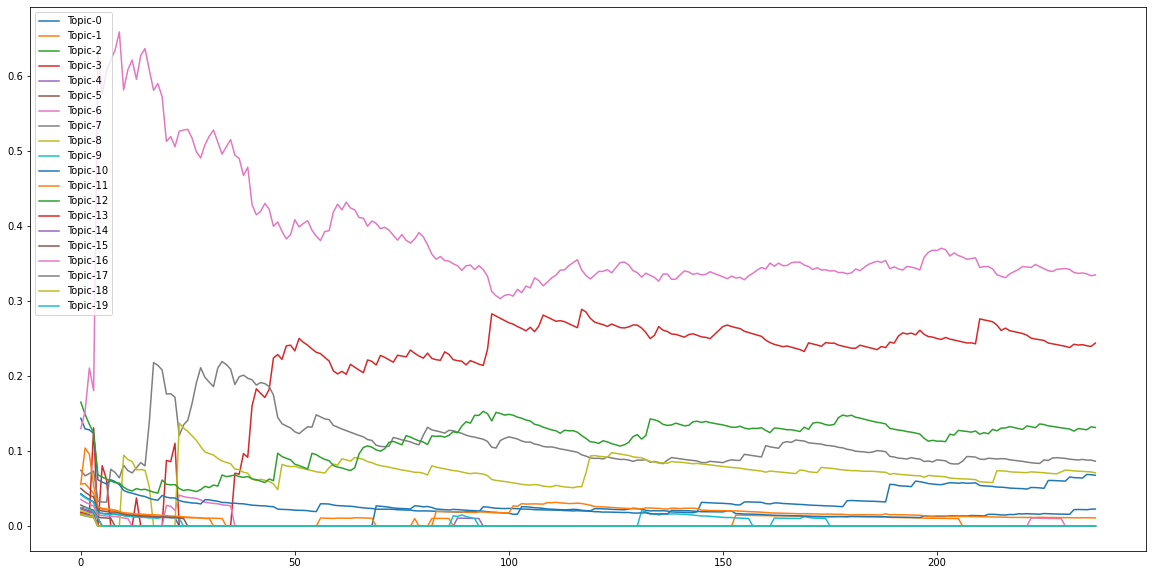

In [ ]:
lines = df.plot.line(figsize=(20, 10))

In [ ]:
lda_model.get_document_topics(corpus[0])

[(0, 0.06732041),
 (3, 0.24296366),
 (7, 0.08679709),
 (8, 0.071964346),
 (10, 0.022602186),
 (11, 0.010801798),
 (12, 0.1335667),
 (16, 0.33312678)]

In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

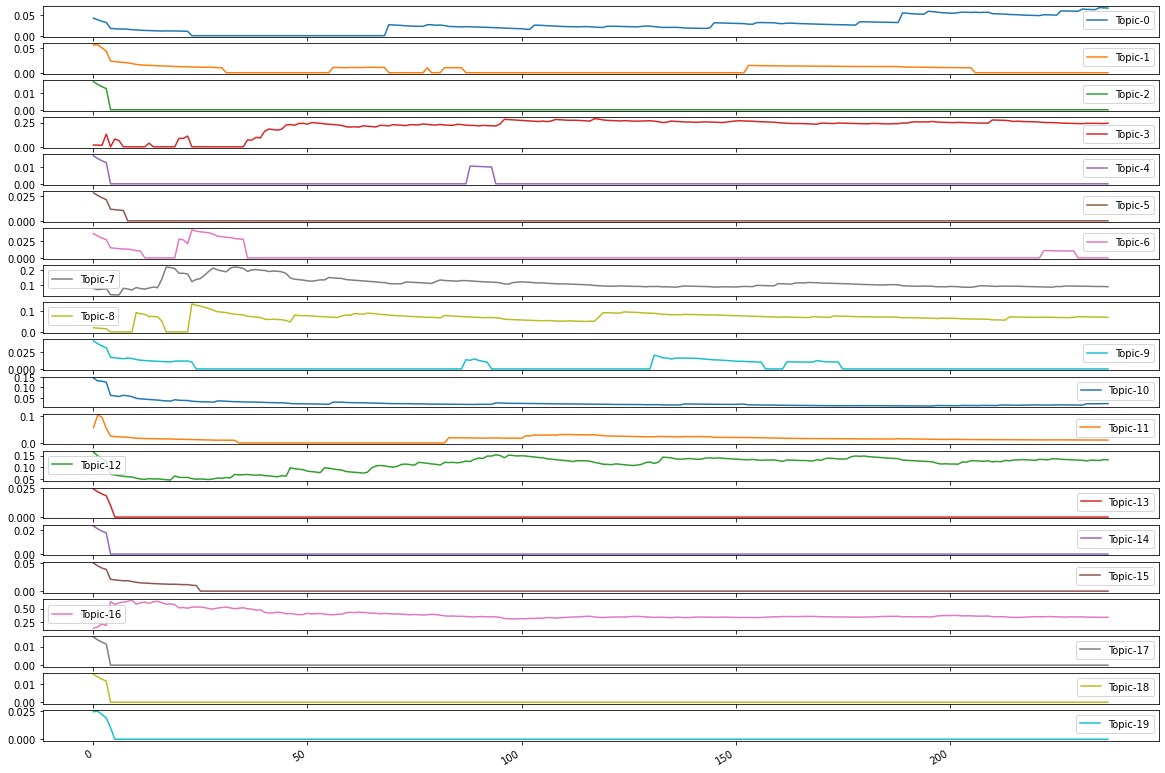

In [ ]:
axes = df.plot.line(subplots=True,figsize=(20, 15))

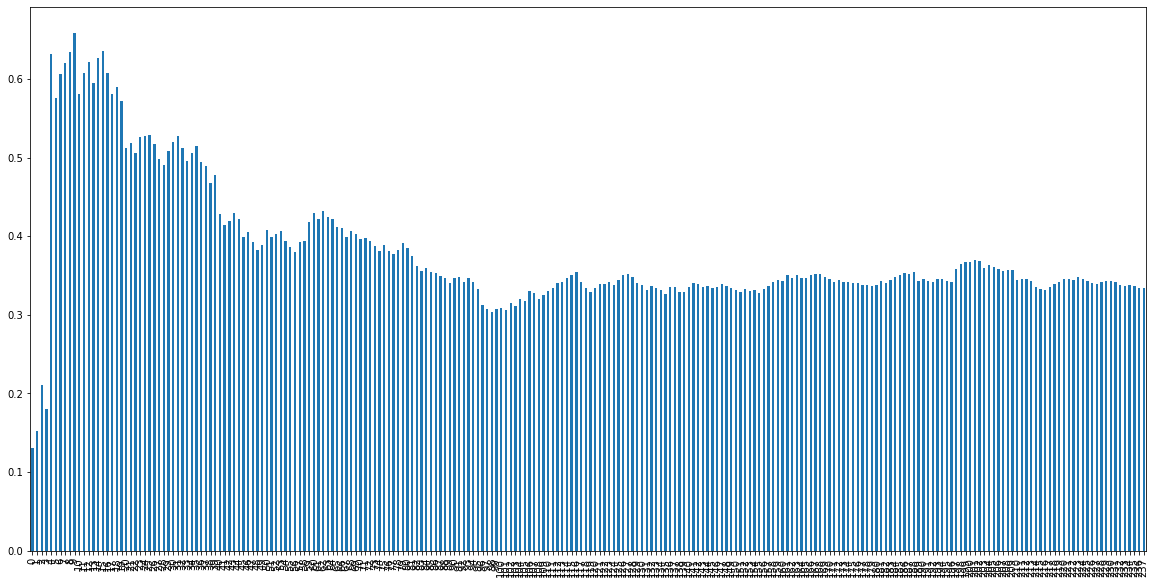

In [ ]:
df['Topic-16'].plot(kind = 'bar',figsize=(20, 10))

In [ ]:
difference = df.diff(periods=1)
difference

,Topic-0,Topic-1,Topic-2,Topic-3,Topic-4,Topic-5,Topic-6,Topic-7,Topic-8,Topic-9,Topic-10,Topic-11,Topic-12,Topic-13,Topic-14,Topic-15,Topic-16,Topic-17,Topic-18,Topic-19
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.00424109,0.000557125,-0.00163571,-0.00128174,-0.00165375,-0.00262462,-0.00350018,-0.00731613,-0.0020087,-0.00412641,-0.0141403,0.0476668,-0.0162589,-0.00233843,-0.00227086,-0.00494832,0.0226922,-0.00148068,-0.00155222,0.000461839
2,-0.0034812,-0.00648052,-0.00137274,-0.00165654,-0.00135744,-0.00230051,-0.00287304,0.00297627,-0.00163636,-0.00338707,-0.00124609,-0.00833169,-0.0133457,-0.00195492,-0.00186399,-0.00406172,0.0579492,-0.00121538,-0.0012741,-0.00308635
3,-0.00290875,-0.0067052,-0.0011538,0.115424,-0.00113422,-0.001955,-0.0024006,0.00339935,-0.00126037,-0.0028301,-0.0048819,-0.0417139,-0.0111511,-0.001562,-0.00149711,-0.00238404,-0.0302168,-0.00101552,-0.00106459,-0.00298818
4,-0.0146503,-0.0198084,-0.0127389,-0.130974,-0.0126607,-0.00954412,-0.012091,-0.040307,-0.0155079,-0.0142542,-0.0617058,-0.0283594,-0.0561643,-0.00832787,-0.0174455,-0.0177274,0.451577,-0.0113357,-0.0118834,-0.0085888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,-0.000206582,0,0,-0.00101578,0,0,0,-0.000391938,-0.000350274,0,0.000265133,-5.88493e-05,0.00342961,0,0,0,-0.00132301,0,0,0
234,-0.000393845,0,0,0.00044018,0,0,0,0.00070858,-0.000407279,0,-0.00019151,0.000136513,-0.000795081,0,0,0,0.000670284,0,0,0
235,0.00487194,0,0,-0.00134429,0,0,0,-0.000901148,-0.000332057,0,-0.000129487,-8.78368e-05,-0.000815213,0,0,0,-0.00123242,0,0,0
236,-0.000443578,0,0,-0.000939697,0,0,0,7.7486e-07,-0.000298046,0,0.000724165,-4.07873e-05,0.00395054,0,0,0,-0.00254703,0,0,0


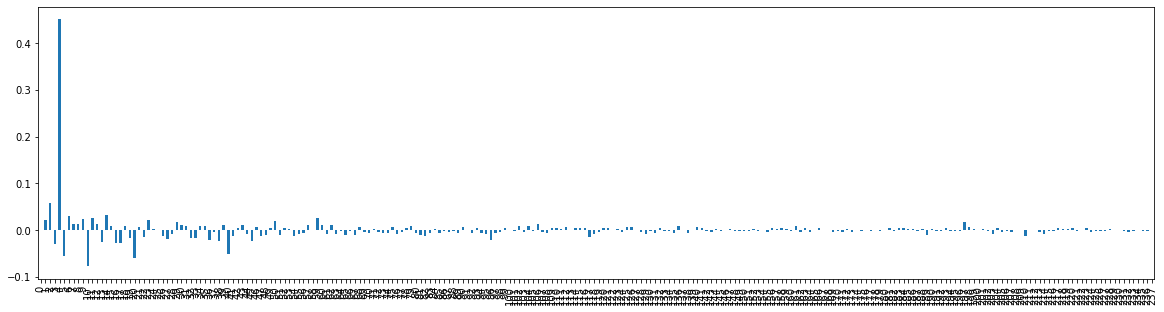

In [ ]:
difference['Topic-16'].plot(kind = 'bar',figsize=(20, 5))

In [ ]:
df_z_scaled = difference.copy()
  
# apply normalization technique to Column 1
column = 'Topic-16'
df_z_scaled[column] = (df_z_scaled[column] - df_z_scaled[column].mean()) / df_z_scaled[column].std()    
  
# view normalized data  
display(df_z_scaled)

,Topic-0,Topic-1,Topic-2,Topic-3,Topic-4,Topic-5,Topic-6,Topic-7,Topic-8,Topic-9,Topic-10,Topic-11,Topic-12,Topic-13,Topic-14,Topic-15,Topic-16,Topic-17,Topic-18,Topic-19
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.00424109,0.000557125,-0.00163571,-0.00128174,-0.00165375,-0.00262462,-0.00350018,-0.00731613,-0.0020087,-0.00412641,-0.0141403,0.0476668,-0.0162589,-0.00233843,-0.00227086,-0.00494832,0.682372,-0.00148068,-0.00155222,0.000461839
2,-0.0034812,-0.00648052,-0.00137274,-0.00165654,-0.00135744,-0.00230051,-0.00287304,0.00297627,-0.00163636,-0.00338707,-0.00124609,-0.00833169,-0.0133457,-0.00195492,-0.00186399,-0.00406172,1.78455,-0.00121538,-0.0012741,-0.00308635
3,-0.00290875,-0.0067052,-0.0011538,0.115424,-0.00113422,-0.001955,-0.0024006,0.00339935,-0.00126037,-0.0028301,-0.0048819,-0.0417139,-0.0111511,-0.001562,-0.00149711,-0.00238404,-0.971631,-0.00101552,-0.00106459,-0.00298818
4,-0.0146503,-0.0198084,-0.0127389,-0.130974,-0.0126607,-0.00954412,-0.012091,-0.040307,-0.0155079,-0.0142542,-0.0617058,-0.0283594,-0.0561643,-0.00832787,-0.0174455,-0.0177274,14.0899,-0.0113357,-0.0118834,-0.0085888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,-0.000206582,0,0,-0.00101578,0,0,0,-0.000391938,-0.000350274,0,0.000265133,-5.88493e-05,0.00342961,0,0,0,-0.0683745,0,0,0
234,-0.000393845,0,0,0.00044018,0,0,0,0.00070858,-0.000407279,0,-0.00019151,0.000136513,-0.000795081,0,0,0,-0.00606137,0,0,0
235,0.00487194,0,0,-0.00134429,0,0,0,-0.000901148,-0.000332057,0,-0.000129487,-8.78368e-05,-0.000815213,0,0,0,-0.0655423,0,0,0
236,-0.000443578,0,0,-0.000939697,0,0,0,7.7486e-07,-0.000298046,0,0.000724165,-4.07873e-05,0.00395054,0,0,0,-0.106639,0,0,0


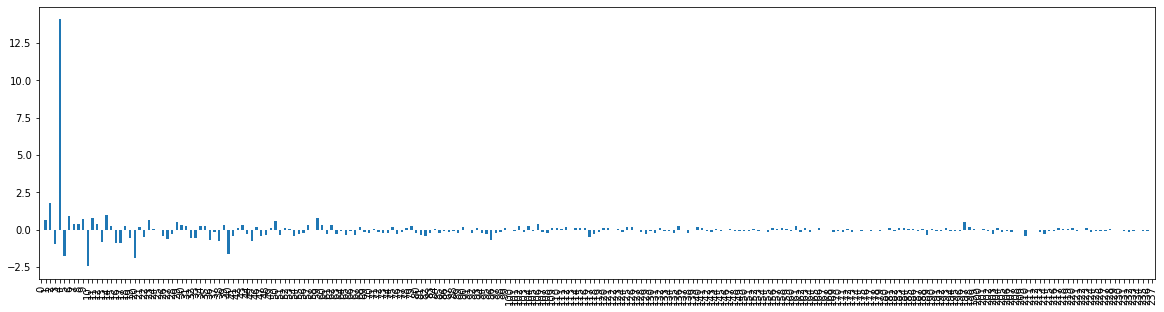

In [ ]:
df_z_scaled['Topic-16'].plot(kind = 'bar',figsize=(20, 5))

In [ ]:
from IPython.display import HTML
def  hlstr(string, color='white'):
    """
    Return HTML markup highlighting text with the desired color.
    """
    return f"<mark style=background-color:{color}>{string} </mark>"

In [ ]:
def colorize(attrs, cmap='PiYG'):
    """
    Compute hex colors based on the attributions for a single instance.
    Uses a diverging colorscale by default and normalizes and scales
    the colormap so that colors are consistent with the attributions.
    """
    import matplotlib as mpl
    cmap_bound = np.abs(attrs).max()
    norm = mpl.colors.Normalize(vmin=-cmap_bound, vmax=cmap_bound)
    cmap = mpl.cm.get_cmap(cmap)

    # now compute hex values of colors
    colors = list(map(lambda x: mpl.colors.rgb2hex(cmap(norm(x))), attrs))
    return colors

In [ ]:
difference.loc[0] = df.loc[0]

In [ ]:
import numpy as np
words = [dictionary[id[0]] for id in corpus[0] ]
colors = colorize(difference['Topic-16'])

In [ ]:
HTML("".join(list(map(hlstr, words, colors))))

In [ ]:
df_z_scaled['Topic-16']

0             NaN
1        0.682372
2         1.78455
3       -0.971631
4         14.0899
          ...    
233    -0.0683745
234   -0.00606137
235    -0.0655423
236     -0.106639
237    0.00934363
Name: Topic-16, Length: 238, dtype: object

In [ ]:
import pickle
pkl_file = open('drive/My Drive/Top-Ex/articles_cleansed.pkl', 'rb')
article_cleansed = pickle.load(pkl_file)
pkl_file.close()

In [ ]:
def getTopicVariationsByDrop(model, corpusItem):
  predict = []
  for i in range(len(corpusItem)):
    item = corpusItem.copy()
    item.pop(i)
    predict.append(lda_model.get_document_topics(item))
  return predict

In [ ]:
p = getTopicVariationsByDrop(lda_model,corpus[0])
# df2 = convertTopicstoDF(p,20)

In [ ]:
df2

,Topic-0,Topic-1,Topic-2,Topic-3,Topic-4,Topic-5,Topic-6,Topic-7,Topic-8,Topic-9,Topic-10,Topic-11,Topic-12,Topic-13,Topic-14,Topic-15,Topic-16,Topic-17,Topic-18,Topic-19
0,0.0677024,0,0,0.23992,0,0,0,0.0871607,0.072319,0,0.0227176,0.0107508,0.134205,0,0,0,0.333824,0,0,0
1,0.0676354,0,0,0.243912,0,0,0,0.0864805,0.0723212,0,0.0226252,0.0108268,0.13457,0,0,0,0.330508,0,0,0
2,0.0677067,0,0,0.240736,0,0,0,0.0868159,0.0716593,0,0.0226919,0.0108214,0.134199,0,0,0,0.334043,0,0,0
3,0.0700383,0,0,0.245508,0,0,0,0.0931357,0.0771119,0,0.0244577,0.0120305,0.144426,0,0,0,0.300612,0,0,0
4,0.0677261,0,0,0.239304,0,0,0,0.0868544,0.0722954,0,0.0227395,0.0108227,0.134073,0,0,0,0.33435,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,0.0677148,0,0,0.24215,0,0,0,0.0860701,0.0723556,0,0.0228089,0.0106671,0.134287,0,0,0,0.332514,0,0,0
234,0.0625106,0,0,0.24436,0,0,0,0.0876919,0.0722907,0,0.0227165,0.010889,0.134393,0,0,0,0.334329,0,0,0
235,0.0677485,0,0,0.243922,0,0,0,0.0868074,0.0722769,0,0.0218809,0.0108405,0.129647,0,0,0,0.335642,0,0,0
236,0.0680387,0,0,0.238454,0,0,0,0.0882185,0.0731419,0,0.022461,0.0109827,0.134556,0,0,0,0.331955,0,0,0


In [ ]:
difference2 = df2.diff(periods=1)
difference2

,Topic-0,Topic-1,Topic-2,Topic-3,Topic-4,Topic-5,Topic-6,Topic-7,Topic-8,Topic-9,Topic-10,Topic-11,Topic-12,Topic-13,Topic-14,Topic-15,Topic-16,Topic-17,Topic-18,Topic-19
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-6.69882e-05,0,0,0.00399201,0,0,0,-0.000680201,2.24262e-06,0,-9.23481e-05,7.59177e-05,0.000365615,0,0,0,-0.00331566,0,0,0
2,7.12574e-05,0,0,-0.00317572,0,0,0,0.000335403,-0.000661887,0,6.66194e-05,-5.37932e-06,-0.000371024,0,0,0,0.003535,0,0,0
3,0.00233161,0,0,0.00477238,0,0,0,0.00631984,0.00545257,0,0.00176584,0.00120911,0.0102269,0,0,0,-0.0334311,0,0,0
4,-0.00231218,0,0,-0.00620413,0,0,0,-0.00628137,-0.00481649,0,-0.00171817,-0.00120782,-0.0103529,0,0,0,0.033738,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,0.000190794,0,0,-0.00163743,0,0,0,-0.00110678,4.38988e-05,0,0.000462657,-0.000187133,0.00408496,0,0,0,-0.00191313,0,0,0
234,-0.00520423,0,0,0.00221016,0,0,0,0.00162173,-6.49244e-05,0,-9.23406e-05,0.000221962,0.000106484,0,0,0,0.00181577,0,0,0
235,0.00523788,0,0,-0.000438318,0,0,0,-0.000884436,-1.38283e-05,0,-0.000835655,-4.8548e-05,-0.00474609,0,0,0,0.00131273,0,0,0
236,0.000290237,0,0,-0.00546794,0,0,0,0.00141111,0.000864998,0,0.000580128,0.000142233,0.00490886,0,0,0,-0.00368699,0,0,0


In [ ]:
difference2.loc[0] = df2.loc[0]

In [ ]:
import numpy as np
words = [dictionary[id[0]] for id in corpus[0] ]
colors = colorize(difference['Topic-16'])

In [ ]:
HTML("".join(list(map(hlstr, words, colors))))

In [ ]:
%%capture
!pip install dalex

In [ ]:
BoW_corpus = [dictionary.doc2bow(doc, allow_update=True) for doc in data_lemmatized]

In [ ]:
print(BoW_corpus[0])

[(0, 1), (1, 1), (2, 1), (3, 10), (4, 1), (5, 1), (6, 1), (7, 1), (8, 2), (9, 3), (10, 2), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 3), (23, 2), (24, 1), (25, 1), (26, 1), (27, 2), (28, 3), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 2), (36, 1), (37, 1), (38, 1), (39, 3), (40, 1), (41, 1), (42, 1), (43, 1), (44, 2), (45, 8), (46, 2), (47, 1), (48, 1), (49, 2), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 3), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 2), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 2), (81, 2), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 2), (90, 1), (91, 1), (92, 1), (93, 1), (94, 2), (95, 6), (96, 1), (97, 1), (98, 1), (99, 1), (100, 1), (101, 1), (102, 1), (103, 1), (104, 1), (105, 2), (106, 1), (107, 2), (108, 1), (109, 1), (110, 1)

In [ ]:
id_words = [[(dictionary[id], count) for id, count in line] for line in BoW_corpus]
print(id_words[0])

[('access', 1), ('acknowledge', 1), ('act', 1), ('administration', 10), ('advocate', 1), ('ally', 1), ('anger', 1), ('annual', 1), ('anticipate', 2), ('appeal', 3), ('appropriate', 2), ('appropriation', 1), ('aspect', 1), ('assert', 1), ('avoid', 1), ('awkward', 1), ('backlash', 1), ('behalf', 1), ('big', 1), ('billion', 1), ('broad', 1), ('cascading', 1), ('case', 3), ('cause', 2), ('challenge', 1), ('champion', 1), ('chaos', 1), ('choose', 2), ('come', 3), ('comment', 1), ('complicate', 1), ('conceivably', 1), ('concept', 1), ('confidence', 1), ('confident', 1), ('congressional', 2), ('consequence', 1), ('conservative', 1), ('consider', 1), ('constitution', 3), ('consumer', 1), ('contend', 1), ('continue', 1), ('control', 1), ('cost', 2), ('could', 8), ('court', 2), ('coverage', 1), ('currently', 1), ('decision', 2), ('deductible', 1), ('defend', 1), ('demand', 1), ('desperate', 1), ('destabilize', 1), ('devastating', 1), ('discuss', 1), ('dismiss', 1), ('dispute', 3), ('distribute',

In [ ]:
lda_model.show_topics

<bound method LdaModel.show_topics of <gensim.models.ldamodel.LdaModel object at 0x7fe1f4ada850>>

In [ ]:
def convertCorpusToBOW():
  

In [ ]:
import dalex as dx

lda_model_xp = dx.Explainer(lda_model, corpus, topics['Topic_01'],
                  label = "Titanic RF Pipeline")

Preparation of a new explainer is initiated



TypeError: ignored

In [ ]:
dx.__version__

'1.2.0'

In [ ]:
print("\033[1;37;40m \033[2;37:40m TextColour BlackBackground          TextColour GreyBackground                WhiteText ColouredBackground\033[0;37;40m\n")
print("\033[1;30;40m Dark Gray      \033[0m 1;30;40m            \033[0;30;47m Black      \033[0m 0;30;47m               \033[0;37;41m Black      \033[0m 0;37;41m")
print("\033[1;31;40m Bright Red     \033[0m 1;31;40m            \033[0;31;47m Red        \033[0m 0;31;47m               \033[0;37;42m Black      \033[0m 0;37;42m")
print("\033[1;32;40m Bright Green   \033[0m 1;32;40m            \033[0;32;47m Green      \033[0m 0;32;47m               \033[0;37;43m Black      \033[0m 0;37;43m")
print("\033[1;33;40m Yellow         \033[0m 1;33;40m            \033[0;33;47m Brown      \033[0m 0;33;47m               \033[0;37;44m Black      \033[0m 0;37;44m")
print("\033[1;34;40m Bright Blue    \033[0m 1;34;40m            \033[0;34;47m Blue       \033[0m 0;34;47m               \033[0;37;45m Black      \033[0m 0;37;45m")
print("\033[1;35;40m Bright Magenta \033[0m 1;35;40m            \033[0;35;47m Magenta    \033[0m 0;35;47m               \033[0;37;46m Black      \033[0m 0;37;46m")
print("\033[1;36;40m Bright Cyan    \033[0m 1;36;40m            \033[0;36;47m Cyan       \033[0m 0;36;47m               \033[0;37;47m Black      \033[0m 0;37;47m")
print("\033[1;37;40m White          \033[0m 1;37;40m            \033[0;37;40m Light Grey \033[0m 0;37;40m               \033[0;37;48m Black      \033[0m 0;37;48m")


 [2;37:40m TextColour BlackBackground          TextColour GreyBackground                WhiteText ColouredBackground

 Dark Gray       1;30;40m             Black       0;30;47m                Black       0;37;41m
 Bright Red      1;31;40m             Red         0;31;47m                Black       0;37;42m
 Bright Green    1;32;40m             Green       0;32;47m                Black       0;37;43m
 Yellow          1;33;40m             Brown       0;33;47m                Black       0;37;44m
 Bright Blue     1;34;40m             Blue        0;34;47m                Black       0;37;45m
 Bright Magenta  1;35;40m             Magenta     0;35;47m                Black       0;37;46m
 Bright Cyan     1;36;40m             Cyan        0;36;47m                Black       0;37;47m
 White           1;37;40m             Light Grey  0;37;40m                Black       0;37;48m


In [ ]:
print( "\033[1;37;40m Black  ")

 Black  
